In [32]:
import pikepdf
import pymupdf
from collections import defaultdict
import matplotlib.pyplot as plt
from my_data_classes import thoraxformkeys, Element, Document
import numpy as np

#### Lese PDF-Blöcke aus PDFs

In [2]:
my_doc = Document(
    name='Thorax und Allgemeines Tumorboard',
    datei_name='tumorboard_aarontest.pdf'
)

In [3]:
my_doc.pdf_bloeke_erstellen()

##### Elements erstellen

In [4]:
title = Element(
    name='title',
    text='thorax- und allgemeines tumorboard'
)

In [5]:
datum = Element(
    name='datum',
    text='datum vorstellung tumorboard'
)

In [6]:
aktuelle_diagnose = Element(
    name='diagnose',
    text='aktuelle diagnose und fragestellung'
)

In [7]:
patientenname = Element(
    name='patientenname',
    text='Name:'
)

In [8]:
geburtstag = Element(
    name='geburtstag',
    text='geb.-datum'
)

In [9]:
my_doc.elements = [datum, title, aktuelle_diagnose, patientenname, geburtstag]

In [10]:
my_doc.add_block_to_elements()

Block added to element
Block added to element
Block added to element
Block added to element
Block added to element


In [11]:
block = my_doc.elements[0].block
block[:4]

(70.91999816894531, 167.4696807861328, 224.4204559326172, 178.6300811767578)

In [22]:
with pymupdf.open(my_doc.datei_name) as doc:
    for page in doc:
        blocks = page.get_text('dict')['blocks']
        simple_blocks = page.get_text("blocks")

In [45]:
x0, y0, x1, y1 = simple_blocks[9][:4]

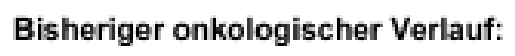

In [46]:
rect = pymupdf.Rect(x0, y0, x1, y1)

def create_view(doc, page, rect):
    pix = doc[page].get_pixmap(clip=rect)
    return pix

In [66]:
def show_block_text(block_number):
    with pymupdf.open(my_doc.datei_name) as doc:
        for page in doc:
            blocks = page.get_text('dict')['blocks']
            simple_blocks = page.get_text("blocks")
        x0, y0, x1, y1 = simple_blocks[block_number][:4]
        rect = pymupdf.Rect(x0, y0, x1, y1)
        pix = create_view(doc, 0, rect)
        img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, pix.n)
        plt.imshow(img)
        plt.axis("off")
        plt.show()

In [ ]:
def show_span_text(span_number):
    

In [129]:
my_iter = iter(range(0,len(simple_blocks)))

<module 'matplotlib.pyplot' from 'C:\\Users\\maxst\\Desktop\\tumorboards\\tbvenv\\lib\\site-packages\\matplotlib\\pyplot.py'>

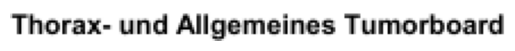

In [131]:
show_block_text(next(my_iter))

In [56]:
simple_blocks[6][4]

'Entscheidungen aus vorangegangenen Tumorboards:\n'

In [132]:
simple_blocks[6]

(70.91999816894531,
 656.4697265625,
 327.0960693359375,
 667.6300659179688,
 'Entscheidungen aus vorangegangenen Tumorboards:\n',
 6,
 0)

In [57]:
blocks[6]

{'number': 6,
 'type': 0,
 'bbox': (70.91999816894531,
  212.10968017578125,
  248.97792053222656,
  223.27008056640625),
 'lines': [{'spans': [{'size': 10.000349998474121,
     'flags': 16,
     'bidi': 0,
     'char_flags': 24,
     'font': 'CIDFont+F2',
     'color': 0,
     'alpha': 255,
     'ascender': 0.9049999713897705,
     'descender': -0.210999995470047,
     'text': 'Aktuelle Diagnose und Fragestellung:',
     'origin': (70.91999816894531, 221.16000366210938),
     'bbox': (70.91999816894531,
      212.10968017578125,
      248.97792053222656,
      223.27008056640625)}],
   'wmode': 0,
   'dir': (1.0, 0.0),
   'bbox': (70.91999816894531,
    212.10968017578125,
    248.97792053222656,
    223.27008056640625)}]}

In [340]:
form_elements = list(my_doc.__dataclass_fields__.keys())[1:]    

In [225]:
title = find_element(title)

Block added to element


In [ ]:
my_doc

In [187]:
print(title.text)

Thorax- und Allgemeines Tumorboard


In [174]:
title.block

(210.48001098632812,
 150.17959594726562,
 427.3993835449219,
 163.5720977783203,
 'Thorax- und Allgemeines Tumorboard\n',
 1,
 0)

In [111]:
anchor = 'datum vorstellung tumorboard'
anchor_block = None
for block in blocks:
    if anchor in block[4].lower():
        anchor_block = block[5]

In [113]:
blocks[anchor_block]

(70.91999816894531,
 167.4696807861328,
 224.4204559326172,
 178.6300811767578,
 'Datum Vorstellung Tumorboard:\n',
 2,
 0)

In [73]:
blocks[19]

(70.91999816894531,
 710.8297119140625,
 92.36907958984375,
 721.9900512695312,
 'tesdt\n',
 19,
 0)

In [69]:
same_line = []
for block in blocks:
    if block[1] > 167.4 and block[1] < 167.5:
        same_line.append(block)

In [68]:
same_line

[(70.91999816894531,
  167.4696807861328,
  224.4204559326172,
  178.6300811767578,
  'Datum Vorstellung Tumorboard:\n',
  2,
  0),
 (244.44000244140625,
  167.4696807861328,
  563.7521362304688,
  178.6300811767578,
  '16.04.2025\nNotfallambulanz Allgemeinchirurgie\n',
  11,
  0)]

In [11]:
anchor = 'Diagnosen'

In [6]:
with open('decomp_tumorboard_aarontest.txt', 'r') as f:
    my_text = f.readlines()

In [7]:
my_text

[' \n',
 'Thorax- und Allgemeines Tumorboard\n',
 'Datum Vorstellung Tumorboard:\n',
 'Geb.-Datum:\n',
 'Aktuelle Diagnose und Fragestellung:\n',
 'ECOG:\n',
 'Entscheidungen aus vorangegangenen Tumorboards:\n',
 'Tumorboardempfehlung:\n',
 'Verwaltung\n',
 'Bisheriger onkologischer Verlauf:\n',
 'Name:\n',
 '16.04.2025\n',
 'Notfallambulanz Allgemeinchirurgie\n',
 'Test, Aaron\n',
 '17.06.1949\n',
 'tetdgfs\n',
 'sdfgds\n',
 'fg\n',
 'sdg\n',
 'sd\n',
 'fg\n',
 'dfg\n',
 '0\n',
 'Kutanes Plattenepithelkarzinom, Kopf hochparietal, Tumordicke: 8 mm, R0-Status, ED (07/2019) \n',
 'pT3, cN0, cM0 (TNM 2010)\n',
 '-aktuell plastische Defektdeckung nach R0 Resektion am 15.8.2019\n',
 'BasosquamÃ¶ses Karzinom, Ã¼ber dem linken Ohr\n',
 'Tumordicke: 5mm, R0 Status, ED (09/2019)\n',
 'Tumorklassifikation:\n',
 '(Initial)\n',
 'Nodalstatus\n',
 'Metastasen\n',
 'L/V/PN\n',
 'Resektionsrand\n',
 'PrimÃ¤rtumor\n',
 'gdf\n',
 'dfg\n',
 'dfg\n',
 '17.02.25 Haut Tumorboard: xxxxxxxxx\n',
 'tesdt\n',
